In [214]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# из этого пакета мы будем использовать стандартные распределения
import scipy
import warnings
warnings.filterwarnings('ignore')

In [215]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

In [216]:
FILE_PATH = '/Users/anton.andreytsev/Empirical-Statistics-EF-MSU-2019/'

### Основные понятия теории вероятностей

$\Omega = \{\omega_{1}, \omega_{2}, \dots, \omega_{n}   \}$ - пространство элементарных исходов, т.е. все возможные реализации в рамках эксперимента. $|\Omega|$ (мощность омега) - количество элементов в этом множестве.

${\bf Пример:}$

Подбрасывается 3 раза монета - как будет выглядеть $\Omega$?

${\bf Решение:}$

$\Omega = \{ooo, oop, opo, poo, opp, ppo, pop, ppp  \}$

Назовём событием А - множество всех элементарных исходов (из $\Omega$), которые удовлетворяют наступлению события А (то есть $A \subset \Omega$). Назовём вероятностью события A ($\mathbb{P}(A)$) отношение мощности А к мощности $\Omega$, то есть $\mathbb{P}(A) = \frac{|A|}{|\Omega|}$

${\bf Пример:}$

Найти вероятность того, что среди трёх бросков монеты хотя бы 1 раза выпадет орёл.

${\bf Решение:}$

$\Omega = \{ ooo, oop, opo, poo, opp, ppo, pop, ppp  \}, \ A = \{ ooo, oop, opo, poo, opp, ppo, pop \}, \Rightarrow |A| = 7, |\Omega| = 8$

Получаем: $\mathbb{P}(A) = \frac{7}{8} = 0.875$

При решении практических задач множества А и $\Omega$ могут быть сложно устроенными и потому прямой подсчёт вероятности затруднителен, однако следствие из [Теоремы Муавра-Лaпласа](https://en.wikipedia.org/wiki/De_Moivre–Laplace_theorem) позволяет оценить погрешность приблежённой оценки вероятности как $$ \mathbb{P} \left( \left| \frac{m}{n} - p  \right| < \epsilon  \right) \underset{n \to \infty}{\to} 2 \cdot \Phi_{0}\left(\epsilon \cdot \sqrt{\frac{n}{p \cdot (1- p)}} \right)  $$

где p - истинная вероятность оцениваемого события, n - число экспериментов, m - число раз, когда эксперимент окончился успехом (то есть $\frac{m}{n}$ - эмпирическая вероятность), $\Phi_{0}(x) = \frac{1}{\sqrt{2 \pi}} \int\limits_{0}^{x} e^{-\frac{t^2}{2}} \ dt$ - неберущийся интерал, но для которого есть таблица значений (таблица Лапласа).

$\Phi_{0}(x)$ - монотонно возрастающая функция, поэтому с ростом n вероятность отклонения эмпирической оценки от теоретической не больше чем на $\epsilon$ стремится к 1.

Оценим вероятность в предыдущей задаче эмприрически

In [20]:
n = int(1e6)
m = 0
for i in tqdm_notebook(range(n)):
    coin_toss_3_times = np.random.randint(0, 2, size=3)
    if coin_toss_3_times.sum() >= 1:
        m += 1
print('Оценённая вероятность:', m/n)


Оценённая вероятность: 0.874755


Основные свойства вероятности:

$A \cup B$ (так же $A + B$) - объединение событий (то есть "наступило событие А или событие В"), $A \cap B$ (так же $(A, B)$ $(A B)$) - пересечение событий (то есть "наступило событие А и событие В"), $\bar A$ - отрицание события (то есть "наступило событие не А")

<p>&#9679; $\mathbb{P}(\Omega) = 1, \ \mathbb{P}(\emptyset) = 0$</p>

<p>&#9679; $\mathbb{P}(A \cap B) = \mathbb{P}(A) \cdot \mathbb{P}(B) \ $ если события А и B - независимы (об этом дальше)</p>

<p>&#9679; $\mathbb{P}(A \cup B) = \mathbb{P}(A) + \mathbb{P}(B) - \mathbb{P}(A \cap B)$ </p>

<p>&#9679; $\mathbb{P}(\overset{\_\_\_\_\_\_}{A \cup B}) = \mathbb{P}(\overset{\_\_}{A} \cap \overset{\_\_}{B}), \ \mathbb{P}(\overset{\_\_\_\_\_\_}{A \cap B}) = \mathbb{P}(\overset{\_\_}{A} \cup \overset{\_\_}{B})$</p>

<p>&#9679; $\mathbb{P}(A \cap B) = \mathbb{P}(A | B) \cdot \mathbb{P}(B) = \mathbb{P}(B | A) \cdot \mathbb{P}(A)$ - формула условной вероятности (отсюда же условная вероятность определятся как $\mathbb{P}(A|B) = \frac{\mathbb{P}(A \cap B)}{\mathbb{P}(B)}$)</p>

<p>&#9679; $\mathbb{P}(A) = \sum\limits_{i=1}^n \mathbb{P}(A|H_{i}) \cdot \mathbb{P}(H_{i}) \ $ где $\sum\limits_{i=1}^n\mathbb{P}(H_{i}) = 1$ - формула полной вероятности  </p>

<p>&#9679; $\mathbb{P}(A|B) = \frac{\mathbb{P}(B|A) \cdot \mathbb{P}(A)}{\mathbb{P}(B)}$ - формула Байеса </p>

Проверим эмпирически верность формулы о вероятности объединения событий на следующей задаче: Подкидываются 3 игральных кубика (по 6 граней на каждом), найти вероятность того, что в сумме выпадет чётное число очков (событие А) или число очков, кратное 3 (событие В). 

In [51]:
n = int(1e6)
prob_dict = {'a_and_b': 0, 'a': 0, 'b': 0, 'a_or_b': 0}
for i in tqdm_notebook(range(n)):
    cube_tosses = np.random.randint(1, 7, size=3)
    cube_tosses_sum = cube_tosses.sum()
    if cube_tosses_sum % 2 == 0 and cube_tosses_sum % 3 == 0:
        prob_dict['a'] += 1/n
        prob_dict['b'] += 1/n
        prob_dict['a_and_b'] += 1/n
        prob_dict['a_or_b'] += 1/n
        
    elif cube_tosses_sum % 2 == 0 and cube_tosses_sum % 3 != 0:
        prob_dict['a'] += 1/n
        prob_dict['a_or_b'] += 1/n
        
    elif cube_tosses_sum % 2 != 0 and cube_tosses_sum % 3 == 0:
        prob_dict['b'] += 1/n
        prob_dict['a_or_b'] += 1/n 

print('P(A или B):', prob_dict['a_or_b'])
print("P(A) + P(B) - P(A и B):", prob_dict['a'] + prob_dict['b'] - prob_dict['a_and_b'])


P(A или B): 0.6661079999983169
P(A) + P(B) - P(A и B): 0.6661079999914006


Теперь рассмотрим определение случайной величины

Отображение $\xi$, которое действует из множества элементарных исходов, в множество действительных чисел называется случайной величиной ($\xi: \Omega \to \mathbb{R}$). Примеры случайных величин (с.в.): Эксперимент - побрасываем n костей, с.в. - число раз, когда выпал орёл (дискретная с.в.), эксперимент - стреляем по мишени в тире, с.в. - расстояние от точки попадания до центра мишени (непрерывная с.в.), эксперимент - замер температуры на улице, с.в. - значение температуры (непрерывная с.в.).

Случайные величины описываются <font color='red'>${\it законом \ распределения}$</font>. Законом распределения (дискретной) случайной величины называется таблица: 

| $x_{1}$ | $x_{2}$ | $\dots$ |$x_{n}$ | 
| --- | --- | --- | --- |
| $\mathbb{P}(\xi = x_{1})$ | $\mathbb{P}(\xi = x_{2})$  | $\dots$ |$\mathbb{P}(\xi = x_{n})$  |

Где $x_{1}, \dots, x_{n}$ - всевозможные значения, которые принимает случайная величина (Обратите внимание, что ввиду этого $\sum\limits_{i=1}^n \mathbb{P}(\xi = x_{i}) = 1$)

Найдём эмпирический закон распределения (вероятности не будут суммироваться в 1) случайной величины $\xi$ в такой задаче: игральный кубик бросается до тех пор, пока сумма накопленных очков не превзойдёт 5. Найти закон распределения числа бросков.


{1: 0.33322699999800254, 2: 0.5002599999935479, 3: 0.14813600000012747, 4: 0.017646999999996995, 5: 0.0007300000000000112}
сумма вероятностей: 0.9999999999916749


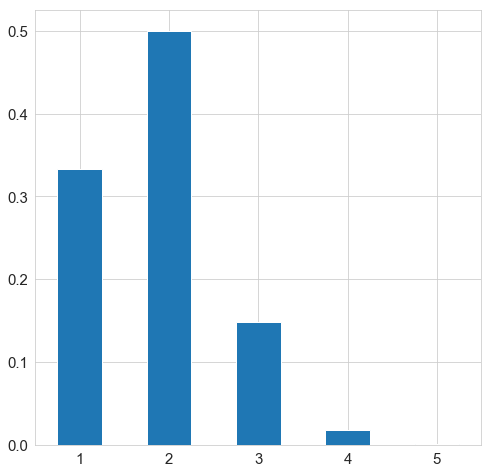

In [91]:
n = int(1e6)
porog = 5
xi_dict = {}
for i in tqdm_notebook(range(n)):
    cum_sum = 0
    n_tosses = 0
    while cum_sum < porog:
        cube_toss = np.random.randint(1, 7)
        cum_sum += cube_toss
        n_tosses += 1
    if n_tosses not in xi_dict:
        xi_dict[n_tosses] = 1/n
    else:
        xi_dict[n_tosses] += 1/n
xi_dict = dict(sorted(xi_dict.items()))
print(xi_dict)
print('сумма вероятностей:', sum(list(xi_dict.values())))
pd.Series(xi_dict).sort_index().plot(kind='bar', fontsize=15);
plt.xticks(rotation=0);

Функцией распределения с.в. называется $F_{\xi}(x) = \mathbb{P}(\xi < x)$

Для предыдущей задачи найдём функцию распределения с.в. $\xi$

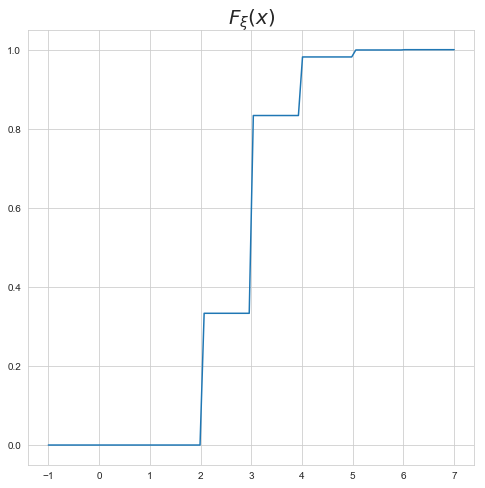

In [131]:
x_dom = np.linspace(-1, 7, 100)
distr_func = lambda x: [sum([xi_dict.get(i, 0) for i in range(int(np.floor(x_dom[0])), int(np.floor(j)))]) for j in x]

plt.plot(x_dom, distr_func(x_dom));
plt.title(r'$F_{\xi}(x)$', fontsize=20);

Заметим, что для любой с.в. $\xi$ будет верно: $F_{\xi}(-\infty) = 0, \ F_{\xi}(+ \infty) = 1$ и $F_{\xi}(x)$ - монотонно неубывающая функция.

Основное свойство функции распределения: $\mathbb{P}(a < \xi < b) = F_{\xi}(b) - F_{\xi}(a)$

Кроме закона распределения у с.в. есть так же всевозможные характеристики, рассмотрим некоторые из них

$\mathbb{E}\xi = \sum\limits_{i=1}^n x_{i} \cdot \mathbb{P}(\xi = x_{i})$ - математическое ожидание (дискретной с.в.). Интерпретация - среднее значение случайной величины.

$\mathbb{D}\xi = \mathbb{E}(\xi - \mathbb{E}\xi)^2$ - дисперсия. Интерпретация - насколько сильно с.в. отклоняется от своего среднего значения. 

$\sigma = \sqrt{\mathbb{D}\xi} $ - стандартное отклонение. Интерпретируется так же, как $\mathbb{D}\xi$, но в отличии от последней имеет единицы измерения такие же как и $\xi$.

Свойства $\mathbb{E}\xi$:

<p>&#9679; $\mathbb{E}(C) = C$, где C - константа </p>

<p>&#9679; $\mathbb{E}(\xi + \eta) = \mathbb{E}\xi + \mathbb{E}\eta$ </p>

<p>&#9679;  $\mathbb{E}(C \cdot \xi) = C \cdot \mathbb{E}\xi$</p>

<p>&#9679;$^{\ast}$  $\mathbb{E}(\xi \cdot \eta) = \mathbb{E}\xi \cdot \mathbb{E}\eta$ - это свойство выполняется только в случае независимости $\xi$ и $\eta$ ($\xi \perp \eta$)</p>

Свойства $\mathbb{D}\xi$:

<p>&#9679; $\mathbb{D}(C) = 0$, где C - константа </p>

<p>&#9679; $\mathbb{D}(\xi + \eta) = \mathbb{D}\xi + \mathbb{D}\eta + 2 \cdot cov(\xi, \eta)$ </p>

<p>&#9679;  $\mathbb{D}(C \cdot \xi) = C^2 \cdot \mathbb{D}\xi$</p>


Для предыдущей задачи найдём $\mathbb{E}\xi, \ \mathbb{D}\xi, \ \sigma$

In [140]:
mean_xi = sum([x*prob for x, prob in xi_dict.items()])
print('Матожидание:', mean_xi)
var_xi = sum([x**2*prob for x, prob in xi_dict.items()]) - mean_xi**2
print('Дисперсия:', var_xi)
print('Стандартное отклонение:', np.sqrt(var_xi))

Матожидание: 1.852392999985469
Дисперсия: 0.5367331735781282
Стандартное отклонение: 0.7326207569937725


Дискретные распределения

Существуют некоторые "классические" законы распределения, познакомимся с некоторыми из них

<font color='red'>распределение Бернулли</font>

Возникает в эксперименте, где всего два возможных исхода (называемые успехом и неудачей соответственно)

$\xi \sim $ Bern(p) $\Rightarrow \mathbb{P}(\xi = x) = p^x (1 - p)^{1 - x}, \ x \in \{0, 1\}$ (По сути это та же монетка)

$\mathbb{E}\xi = p, \ \mathbb{D}\xi = p \cdot (1 - p)$

<font color='red'>распределение Биномиальное</font>

Возникает в случае n испытаний Бернулли

$\xi \sim$ Bin(n, p) $\Rightarrow \mathbb{P}(\xi = x) = C_{n}^x p^{x} (1 - p)^{n - x}, \ x=0, 1, \dots, n$

$\mathbb{E}\xi = np, \ \mathbb{D}\xi = np(1-p)$

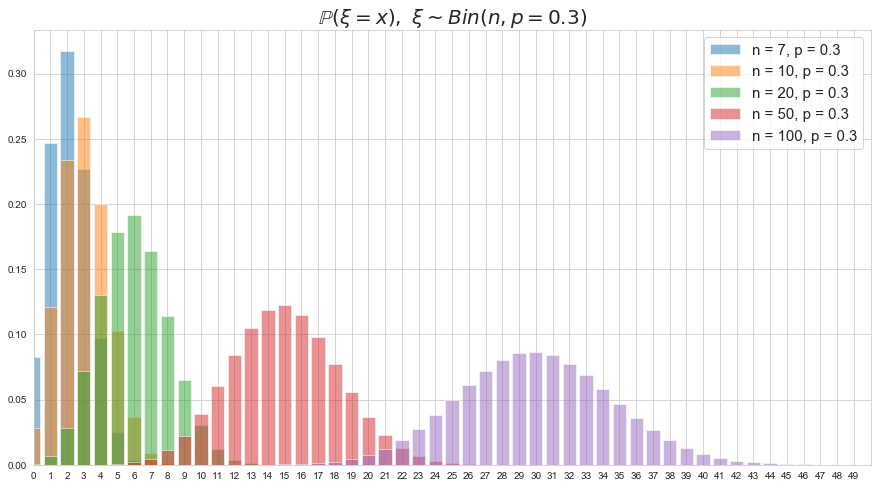

In [96]:
plt.figure(figsize=(15, 8))
for n in [7, 10, 20, 50, 100]:
    x_dom = np.arange(0, n)
    plt.bar(x_dom, scipy.stats.distributions.binom.pmf(x_dom, n=n, p=0.3), alpha=0.5, label='n = {}, p = 0.3'.format(n));
plt.legend(fontsize=15);
plt.title(r'$\mathbb{P}(\xi = x), \ \xi \sim Bin(n, p=0.3)$', fontsize=20);
plt.xlim(0, 50)
plt.xticks(x_dom[:50]);

<font color='red'>распределение Пуассона</font>

Возникает как предельный случай распределения Биномиального, при $n \to \infty, \ p \to 0, \ np \to \lambda$

$\xi \sim $ Poi($\lambda$) $\Rightarrow \mathbb{P}(\xi = x) = \frac{\lambda^x}{x!}e^{-\lambda}, \ x = 0, 1, 2, \dots$

$\mathbb{E}\xi = \lambda, \ \mathbb{D}\xi = \lambda$

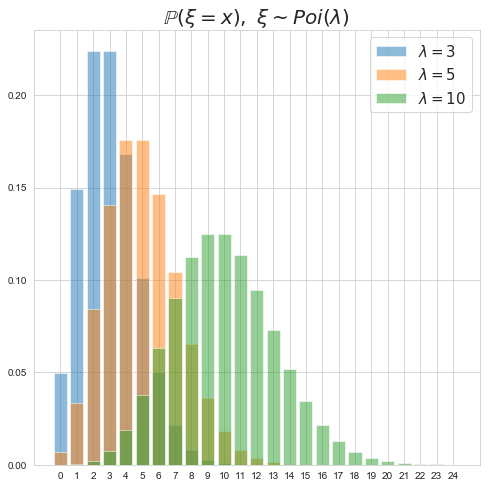

In [73]:
x_dom = np.arange(0, 25)
plt.bar(x_dom, scipy.stats.distributions.poisson.pmf(x_dom, mu=3), alpha=0.5, label=r'$\lambda = 3$');
plt.bar(x_dom, scipy.stats.distributions.poisson.pmf(x_dom, mu=5), alpha=0.5, label=r'$\lambda = 5$');
plt.bar(x_dom, scipy.stats.distributions.poisson.pmf(x_dom, mu=10), alpha=0.5, label=r'$\lambda = 10$');
plt.legend(fontsize=15);
plt.title(r'$\mathbb{P}(\xi = x), \ \xi \sim Poi(\lambda)$', fontsize=20);
plt.xticks(x_dom);

<font color='red'>распределение Геометрическое</font>

Возникает в задаче определения первого успеха в череде испытаний Бернулли. Пусть например $\xi$ - число бросков монеты, до первого впадения орла, тогда $\xi \sim $ Geom(0.5)

$\xi \sim $ Geom(p) $\Rightarrow \mathbb{P}(\xi = x) = p(1-p)^{x-1}, \ x=1, 2, \dots $

$\mathbb{E}\xi = \frac{1}{p}, \ \mathbb{D}\xi = \frac{1-p}{p^2}$

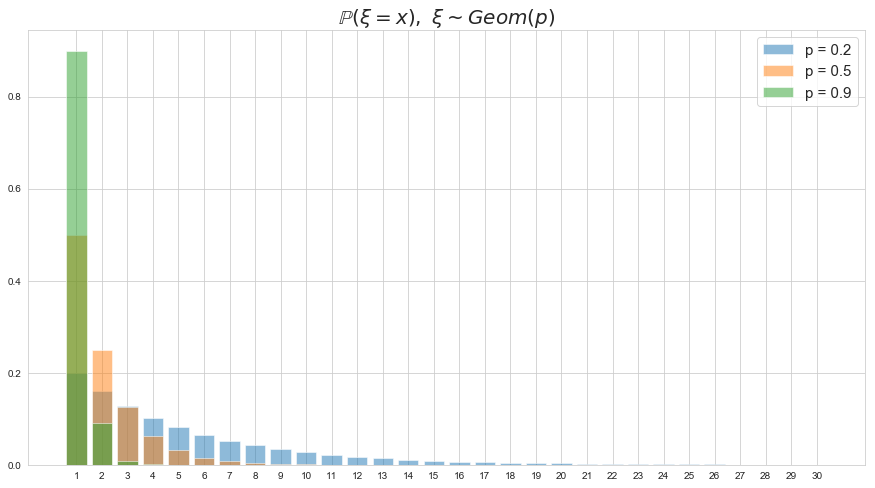

In [108]:
plt.figure(figsize=(15, 8))
x_dom = np.arange(1, 31)
for p in [0.2, 0.5, 0.9]:
    plt.bar(x_dom, scipy.stats.distributions.geom.pmf(x_dom, p=p), alpha=0.5, label='p = {}'.format(p));
plt.legend(fontsize=15);
plt.title(r'$\mathbb{P}(\xi = x), \ \xi \sim Geom(p)$', fontsize=20);
plt.xticks(x_dom);

Непрерывные распределения

Выше мы рассмотрели дискретные случайные величины и некоторые классические дискретные распределения. Теперь же рассмотрим некоторые классические непрерывные распределения.

Основное отличие от дискретных состоит в том, что непрерывные с.в. принимают несчётное число значений, а потому выписать для них закон распределения в виде таблицы, как это было для дискретных с.в. не представляется возможным. Для непрерывных с.в. вместо закона распределения вводится понятие <font color='purple'>плотности распределения</font> ($p_{\xi}(x)$). Неформально можно представлять, что плотность распределения это примерно то же самое, что вероятность для с.в. принять какое-то значение, т.е. $p_{\xi}(x) \approx \mathbb{P}(\xi = x)$, однако, как мы увидим далее, в отличае от вероятности, плотность может быть > 1.

Свойства $p_{\xi}(x):$

<p>&#9679; $p_{\xi}(x) \ge 0, \ \forall x$ - условие неотрицательности</p>

<p>&#9679; $\int\limits_{- \infty}^{+ \infty} p_{\xi}(x) \ dx = 1$ - условие нормировки</p>

<p>&#9679; $F_{\xi}(x) = \mathbb{P}(\xi < x) = \int\limits_{-\infty}^x p_{\xi}(t) \ dt, \ p_{\xi}(x) = F_{\xi}(x)^{\prime}$</p> - взаимосвязь плотности и функции распределения

Ввиду несчётности множества значений непрерывной с.в. матожидание не может теперь определяться, как $\sum\limits_{i=1}^n x_{i} \cdot \mathbb{P}(\xi = x)$. В непрерывном случае матожидание определяется как $\mathbb{E}\xi = \int\limits_{- \infty}^{+ \infty} x \cdot p_{\xi}(x) \ dx$ 

Остальные характеристики ($\mathbb{D}\xi, \ \sigma, \ \dots$) для непрерывных с.в. определяются точно так же, как и для дискретных

Рассмотрим некоторые классические непрерывные распределения

<font color='red'>Равномерное распределение (на отрезке [a, b])</font>

$\xi \sim Uni(a, b) \Rightarrow p_{\xi}(x) = \left\{\begin{array}{rcl}  \frac{1}{b-a}, x \in [a, b] \\ 0, x \not \in [a, b]  \end{array} \right., \ F_{\xi}(x) = \left\{\begin{array}{rcl}  0, x \le a \\ \frac{x - a}{b-a}, x \in [a, b] \\ 1, x \ge b  \end{array} \right.$

$\mathbb{E}\xi = \frac{a+b}{2}, \ \mathbb{D}\xi = \frac{(b-a)^2}{12}$

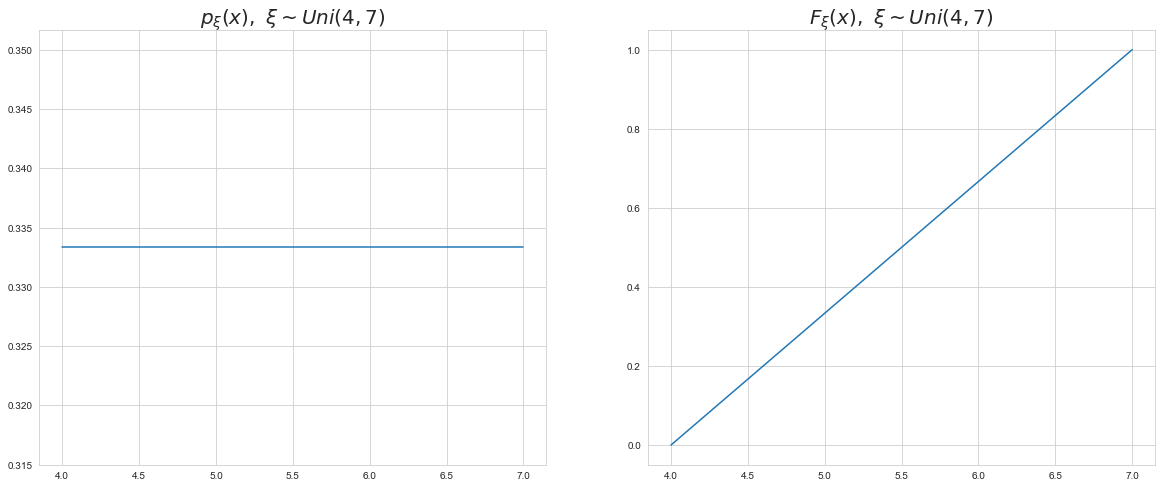

In [127]:
a, b = 4, 7
x_dom = np.linspace(a, b, 100)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax[0].plot(x_dom, [1/(b-a) for i in x_dom]);
ax[0].set_title(r'$p_{\xi}(x), \ \xi \sim Uni(4, 7)$', fontsize=20);
ax[1].plot(x_dom, [(i - a)/(b-a) for i in x_dom]);
ax[1].set_title(r'$F_{\xi}(x), \ \xi \sim Uni(4, 7)$', fontsize=20);

<font color='red'>Показательное (экспоненциальное) распределение</font>

С помощью показательного распределения моделируется время ожидания между событиями.

$\xi \sim Exp(\theta) \Rightarrow p_{\xi}(x) = \frac{1}{\theta}e^{-\frac{x}{\theta}}, \ x \ge 0, \ F_{\xi}(x) = 1 - e^{-\frac{x}{\theta}}, x \ge 0$

$\mathbb{E}\xi = \theta, \ \mathbb{D}\xi = \theta^2$

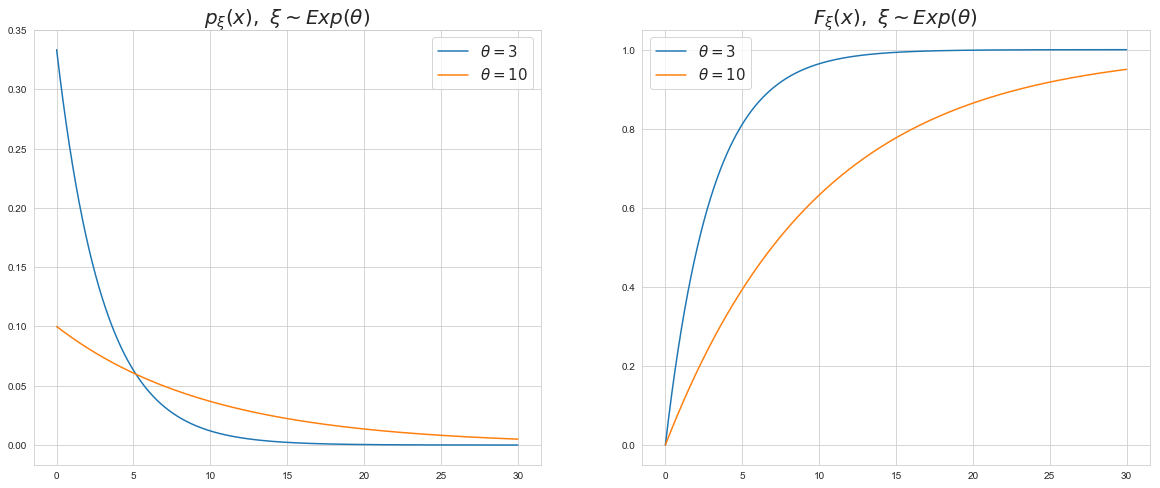

In [149]:
x_dom = np.linspace(0, 30, 1000)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
p_exp = lambda x, theta: (1/theta)*np.exp(-x/theta)
F_exp = lambda x, theta: 1 - np.exp(-x/theta)
ax[0].plot(x_dom, p_exp(x_dom, 3), label=r'$\theta = 3$');
ax[0].plot(x_dom, p_exp(x_dom, 10), label=r'$\theta = 10$');
ax[0].legend(fontsize=15);
ax[0].set_title(r'$p_{\xi}(x), \ \xi \sim Exp(\theta)$', fontsize=20);
ax[1].plot(x_dom, F_exp(x_dom, 3), label=r'$\theta = 3$');
ax[1].plot(x_dom, F_exp(x_dom, 10), label=r'$\theta = 10$');
ax[1].legend(fontsize=15);
ax[1].set_title(r'$F_{\xi}(x), \ \xi \sim Exp(\theta)$', fontsize=20);

<font color='red'>Нормальное распределение</font>

Пожалуй самое часто используемое в приложениях, а особенно в эмпирических методах распределение. Возникает как предельный случай некоторых распределений (Биномиального при $n \to \infty$, Стьюдента, Коши, Пуассона и др.). Фигурирует в [Центральной предельной теореме](https://ru.wikipedia.org/wiki/Центральная_предельная_теорема).

$\xi \sim \mathcal{N}(a, \sigma^2) \Rightarrow p_{\xi}(x) = \frac{1}{\sigma \sqrt{2 \pi}} \cdot e^{- \frac{(x - a)^2}{2 \sigma^2}}, \ x \in \mathbb{R}, \ F_{\xi}(x) = \frac{1}{\sigma \sqrt{2 \pi}} \int\limits_{- \infty}^x e^{- \frac{(t - a)^2}{2 \sigma^2}} \ dt$

$\mathbb{E}\xi = a, \ \mathbb{D}\xi = \sigma^2$

$\mathcal{N}(0, 1)$ - стандартное нормальное распределение

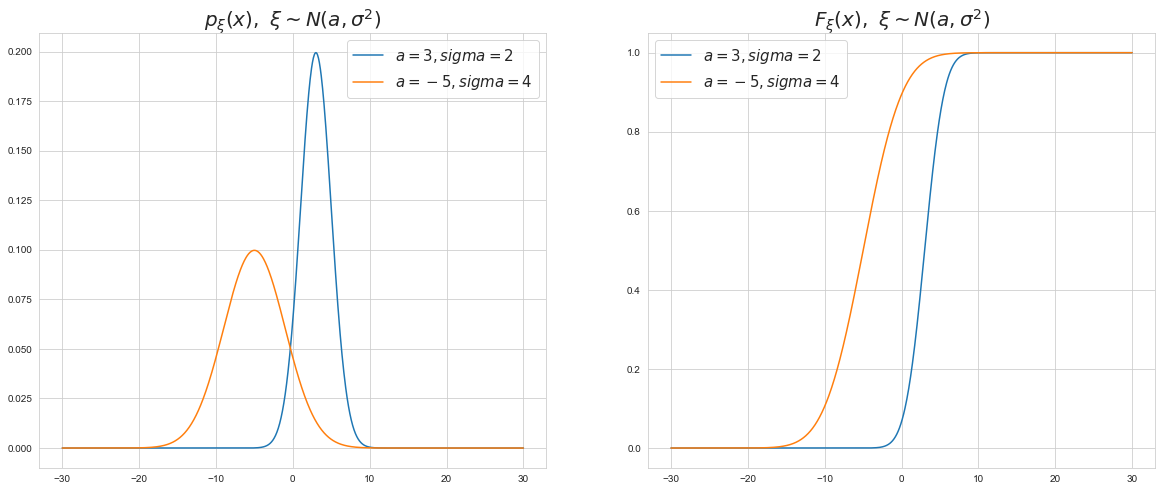

In [160]:
x_dom = np.linspace(-30, 30, 1000)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
p_exp = lambda x, a, sigma: (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x - a)**2/(2*sigma**2))
F_exp = lambda x, theta: 1 - np.exp(-x/theta)
ax[0].plot(x_dom, p_exp(x_dom, a=3, sigma=2), label=r'$a = 3, sigma = 2$');
ax[0].plot(x_dom, p_exp(x_dom, a=-5, sigma=4), label=r'$a = -5, sigma = 4$');
ax[0].legend(fontsize=15);
ax[0].set_title(r'$p_{\xi}(x), \ \xi \sim N(a, \sigma^2)$', fontsize=20);
ax[1].plot(x_dom, scipy.stats.distributions.norm.cdf(x_dom, loc=3, scale=2), label=r'$a = 3, sigma = 2$');
ax[1].plot(x_dom, scipy.stats.distributions.norm.cdf(x_dom, loc=-5, scale=4), label=r'$a = -5, sigma = 4$');
ax[1].legend(fontsize=15);
ax[1].set_title(r'$F_{\xi}(x), \ \xi \sim N(a, \sigma^2)$', fontsize=20);

<font color='red'>Распределение $\chi^2_{n}$</font>

Хи-квадрат распределение это по определению распределение суммы квадратов с.в., имеющих стандартное нормальное распределение 

($\eta = \sum\limits_{i=1}^n \xi_{i}^2, \ \xi_{i} \sim \mathcal{N}(0, 1), \Rightarrow \eta \sim \chi^2_{n}$). Оно фигурирует в Лемме Фишера и возникает в ситуациях, когда мы хотим измерять Евклидовы расстояния между нормальными с.в.

$\xi \sim \chi^2_{n} \Rightarrow p_{\xi}(x) = \frac{x^{\frac{n}{2} - 1}}{2^{\frac{n}{2}} \Gamma(\frac{n}{2})} \cdot e^{-\frac{x}{2}}, \ x \ge 0$

$\Gamma(\alpha) = \int\limits_{0}^{+ \infty} x^{\alpha - 1} e^{-x} \ dx$ - Гамма функция Эйлера

$\mathbb{E}\xi = n, \ \mathbb{D}\xi = 2n$

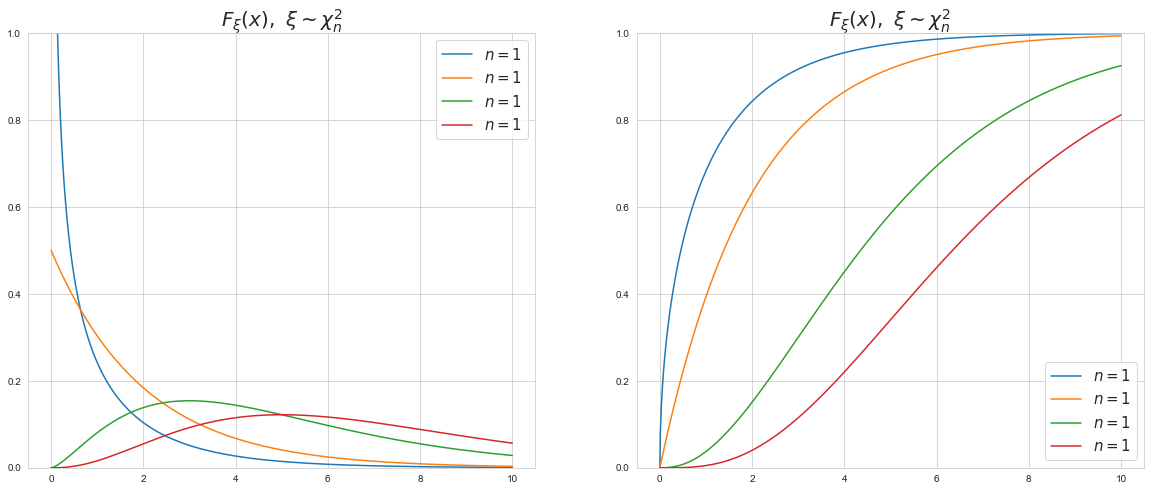

In [206]:
x_dom = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
for n in [1, 2, 5, 7]:
    ax[0].plot(x_dom, scipy.stats.distributions.chi2.pdf(x_dom, df=n), label=r'$n=1$');
    ax[0].set_ylim(0, 1)
    ax[0].legend(fontsize=15);
    ax[0].set_title(r'$F_{\xi}(x), \ \xi \sim \chi^2_{n}$', fontsize=20);
    ax[1].plot(x_dom, scipy.stats.distributions.chi2.cdf(x_dom, df=n), label=r'$n=1$');
    ax[1].set_ylim(0, 1)
    ax[1].legend(fontsize=15);
    ax[1].set_title(r'$F_{\xi}(x), \ \xi \sim \chi^2_{n}$', fontsize=20);

Проверим, что $\chi^2_{n} = \sum\limits_{i=1}^n \xi_{i}^2, \ \xi_{i} \sim \mathcal{N}(0, 1)$

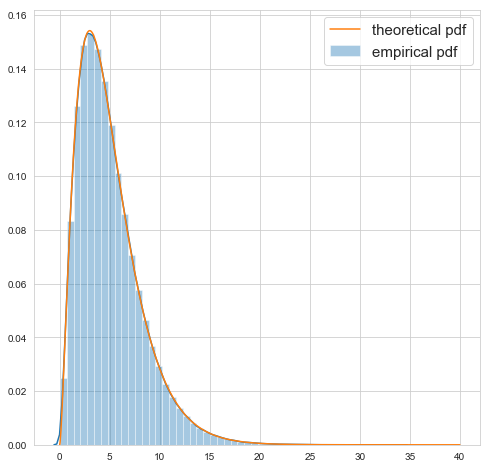

In [220]:
xi = np.random.normal(size=(int(1e6), 5))
x_dom = np.linspace(0, 40, 1000)
empir_chi = (xi**2).sum(axis=1)
sns.distplot(empir_chi, label='empirical pdf')
plt.plot(x_dom, scipy.stats.distributions.chi2.pdf(x_dom, df=5), label='theoretical pdf');
plt.legend(fontsize=15);

Со списком основных распределений можно ознакомиться [здесь](https://en.wikipedia.org/wiki/List_of_probability_distributions#Continuous_distributions)

Будем исследовать выборы 2018 (https://github.com/SlinkoIgor/russian_elections_2018/tree/master/results_20_Mar_2018_12_03)

In [44]:
dat = pd.read_csv(os.path.join(FILE_PATH, 'data/elections_2018.csv'))

In [48]:
print(dat.shape)
dat.head()

(100470, 24)


,region,tik,uik,url,Бабурин Сергей Николаевич,Грудинин Павел Николаевич,Жириновский Владимир Вольфович,Путин Владимир Владимирович,Собчак Ксения Анатольевна,Сурайкин Максим Александрович,...,Число избирательных бюллетеней в переносных ящиках для голосования,"Число избирательных бюллетеней, выданных в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных вне помещения для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим досрочно","Число избирательных бюллетеней, не учтенных при получении","Число избирательных бюллетеней, полученных участковой избирательной комиссией",Число недействительных избирательных бюллетеней,Число погашенных избирательных бюллетеней,Число утраченных избирательных бюллетеней,Явлинский Григорий Алексеевич
0,98 Город Байконур (Республика Казахстан),98 Город Байконур (Республика Казахстан),УИК №8140,http://www.vybory.izbirkom.ru/region/izbirkom?...,4,176,79,1136,30,9,...,11,1447,11,0,0,2000,9,542,0,10
1,98 Город Байконур (Республика Казахстан),98 Город Байконур (Республика Казахстан),УИК №8141,http://www.vybory.izbirkom.ru/region/izbirkom?...,2,128,87,1214,19,4,...,14,1470,14,0,0,2000,14,516,0,9
2,98 Город Байконур (Республика Казахстан),98 Город Байконур (Республика Казахстан),УИК №8142,http://www.vybory.izbirkom.ru/region/izbirkom?...,5,171,94,1162,17,3,...,7,1490,7,0,0,2000,27,503,0,6
3,98 Город Байконур (Республика Казахстан),98 Город Байконур (Республика Казахстан),УИК №8143,http://www.vybory.izbirkom.ru/region/izbirkom?...,5,98,72,882,17,8,...,48,1065,48,0,0,1500,20,387,0,6
4,98 Город Байконур (Республика Казахстан),98 Город Байконур (Республика Казахстан),УИК №8144,http://www.vybory.izbirkom.ru/region/izbirkom?...,7,124,105,902,7,9,...,13,1171,13,0,0,1500,10,316,0,10


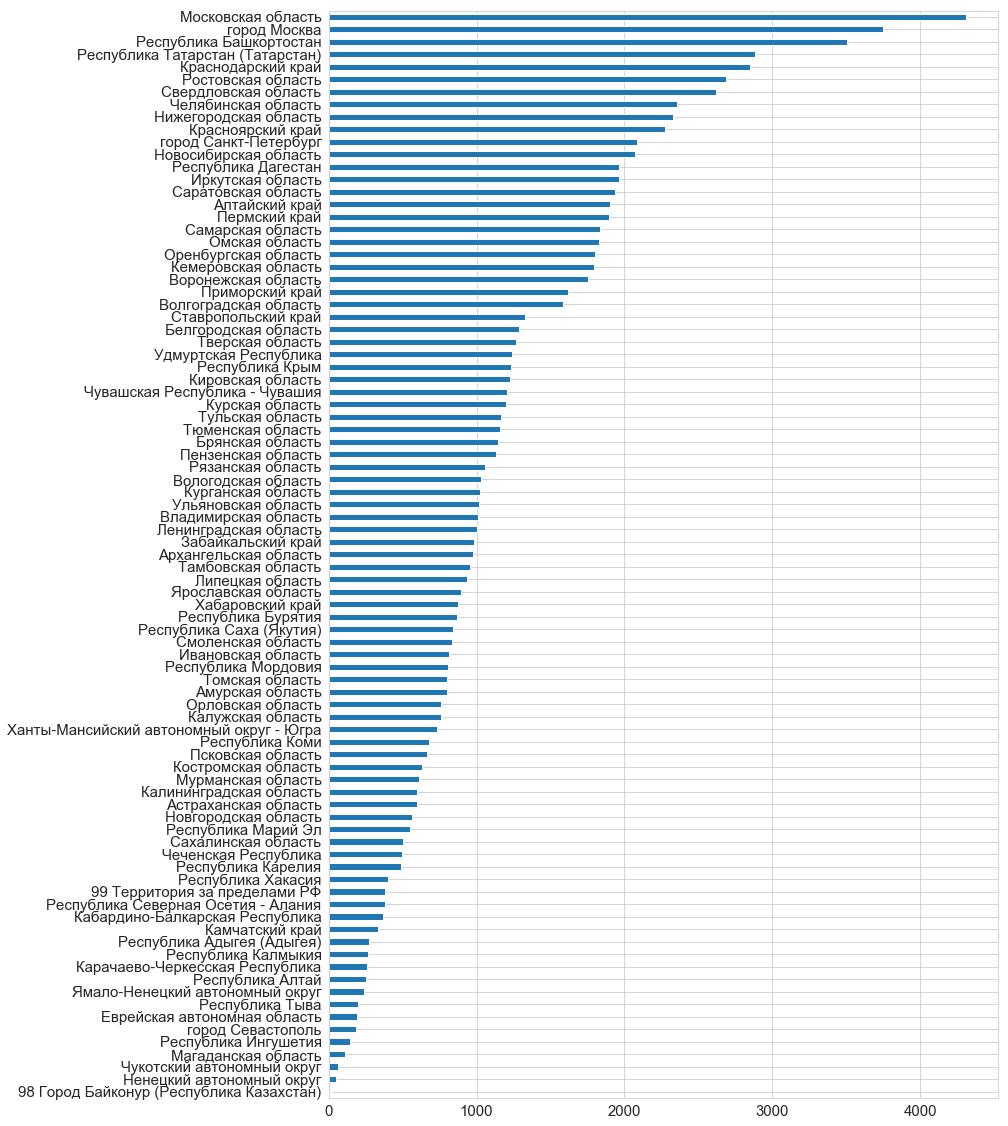

In [58]:
plt.figure(figsize=(12, 20))
dat.region.value_counts().sort_values(ascending=True).plot(kind='barh', fontsize=15);

Задача кредитного скоринга

In [91]:
dat = pd.read_csv(os.path.join(FILE_PATH, 'data/german.csv'), sep=';')
dat.columns = ['_'.join(col.lower().replace('/',' ').strip().split()) for col in dat.columns]
print(dat.shape)
dat.head()

(1000, 21)


,status_of_existing_checking_account,duration_in_month,credit_history,purpose,credit_amount,savings_account_bonds,present_employment_since,installment_rate_in_percentage_of_disposable_income,personal_status_and_sex,other_debtors_guarantors,...,property,age_in_years,other_installment_plans,housing,number_of_existing_credits_at_this_bank,job,number_of_people_being_liable_to_provide_maintenance_for,telephone,foreign_worker,bad_credit
0,1 : ... < 0 DM,6,4 : critical account/ other credits existing (...,3 : radio/television,1169,5 : unknown/ no savings account,5 : .. >= 7 years,4,3 : male : single,1 : none,...,1 : real estate,67,3 : none,2 : own,2,3 : skilled employee / official,1,"2 : yes, registered under the customers name",1 : yes,0
1,2 : 0 <= ... < 200 DM,48,2 : existing credits paid back duly till now,3 : radio/television,5951,1 : ... < 100 DM,3 : 1 <= ... < 4 years,2,2 : female : divorced/separated/married,1 : none,...,1 : real estate,22,3 : none,2 : own,1,3 : skilled employee / official,1,1 : none,1 : yes,1
2,4 : no checking account,12,4 : critical account/ other credits existing (...,6 : education,2096,1 : ... < 100 DM,4 : 4 <= ... < 7 years,2,3 : male : single,1 : none,...,1 : real estate,49,3 : none,2 : own,1,2 : unskilled - resident,2,1 : none,1 : yes,0
3,1 : ... < 0 DM,42,2 : existing credits paid back duly till now,2 : furniture/equipment,7882,1 : ... < 100 DM,4 : 4 <= ... < 7 years,2,3 : male : single,3 : guarantor,...,2 : if not 1 : building society savings agreem...,45,3 : none,3 : for free,1,3 : skilled employee / official,2,1 : none,1 : yes,0
4,1 : ... < 0 DM,24,3 : delay in paying off in the past,0 : car (new),4870,1 : ... < 100 DM,3 : 1 <= ... < 4 years,3,3 : male : single,1 : none,...,4 : unknown / no property,53,3 : none,3 : for free,2,3 : skilled employee / official,2,1 : none,1 : yes,1


Есть ли в данных пропуски

In [92]:
dat.isnull().sum()

status_of_existing_checking_account                         0
duration_in_month                                           0
credit_history                                              0
purpose                                                     0
credit_amount                                               0
savings_account_bonds                                       0
present_employment_since                                    0
installment_rate_in_percentage_of_disposable_income         0
personal_status_and_sex                                     0
other_debtors_guarantors                                    0
present_residence_since                                     0
property                                                    0
age_in_years                                                0
other_installment_plans                                     0
housing                                                     0
number_of_existing_credits_at_this_bank                     0
job     

Описательные статистики переменных

In [93]:
dat.describe()

,duration_in_month,credit_amount,installment_rate_in_percentage_of_disposable_income,present_residence_since,age_in_years,number_of_existing_credits_at_this_bank,number_of_people_being_liable_to_provide_maintenance_for,bad_credit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


Корреляционная матрица переменных

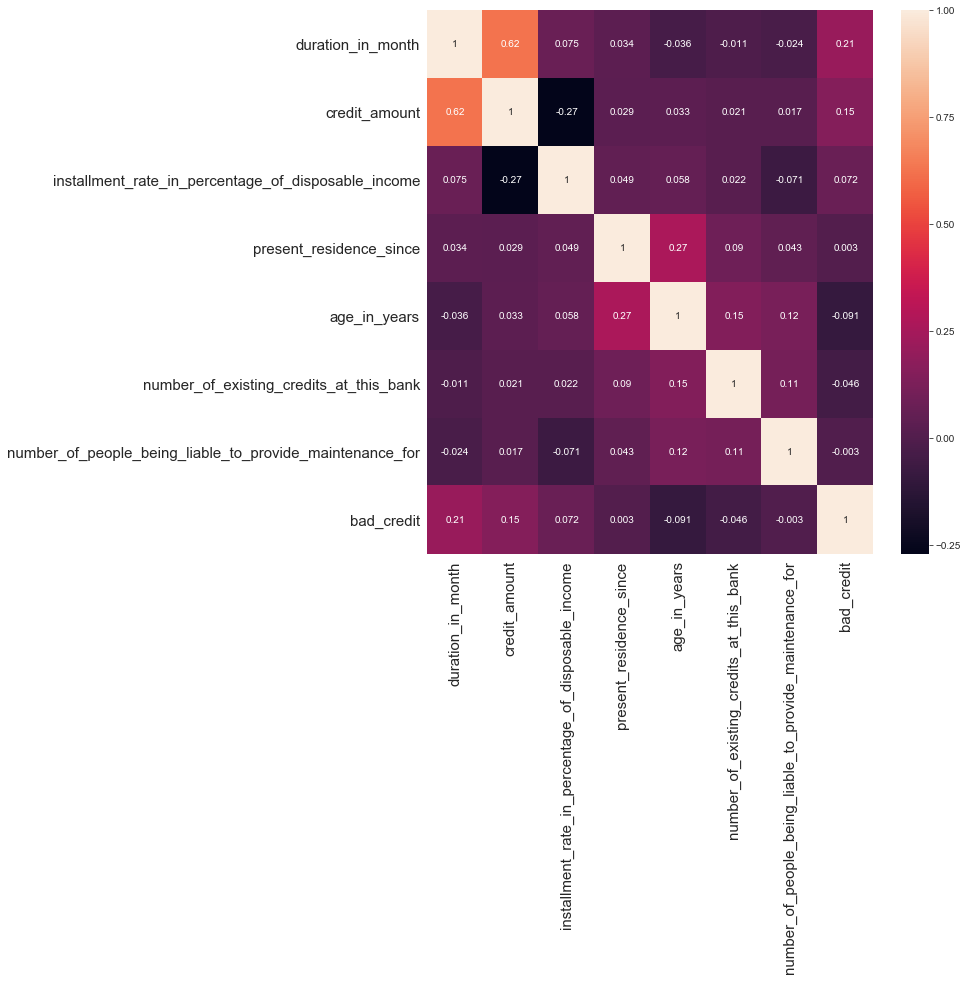

In [94]:
plt.figure(figsize=(10, 10))
sns.heatmap(dat.corr(), annot=True, annot_kws={'size': 10});
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

Сколько уникальных значений у каждой переменной

In [95]:
for col in dat.columns:
    print('{}:'.format(col), dat[col].value_counts().shape[0])

status_of_existing_checking_account: 4
duration_in_month: 33
credit_history: 5
purpose: 10
credit_amount: 921
savings_account_bonds: 5
present_employment_since: 5
installment_rate_in_percentage_of_disposable_income: 4
personal_status_and_sex: 4
other_debtors_guarantors: 3
present_residence_since: 4
property: 4
age_in_years: 53
other_installment_plans: 3
housing: 3
number_of_existing_credits_at_this_bank: 4
job: 4
number_of_people_being_liable_to_provide_maintenance_for: 2
telephone: 2
foreign_worker: 2
bad_credit: 2


Посмотрим на распределения переменных

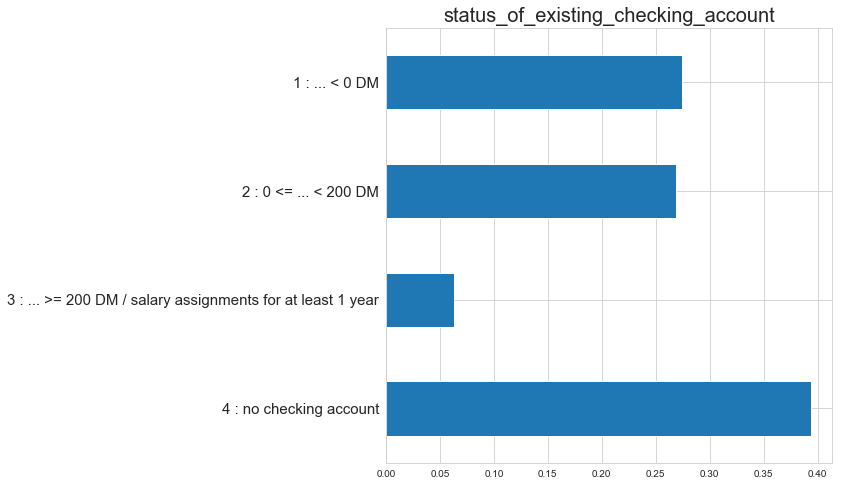

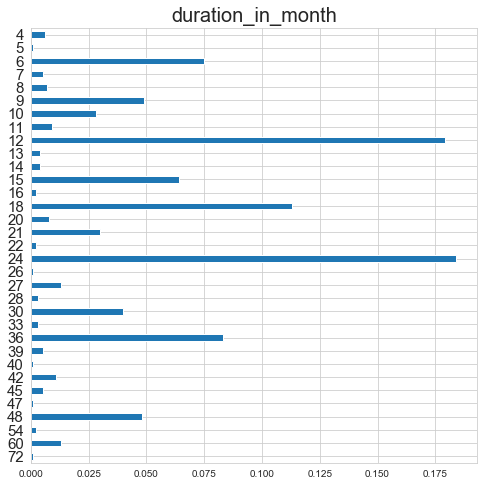

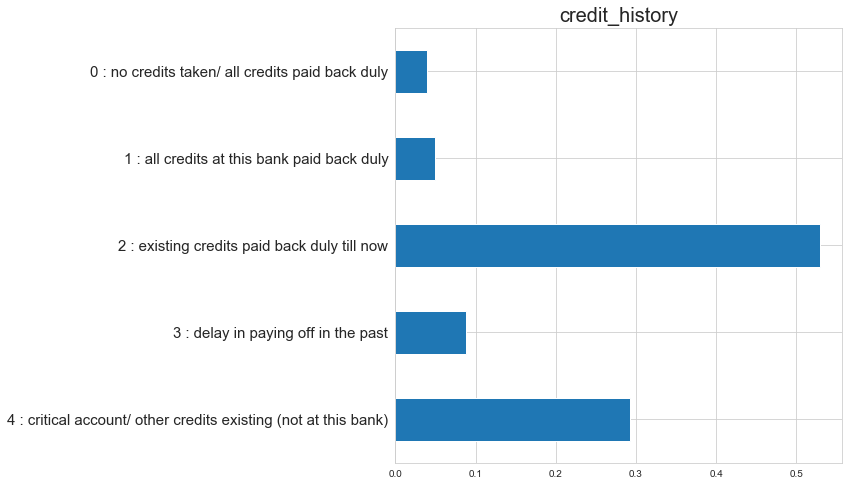

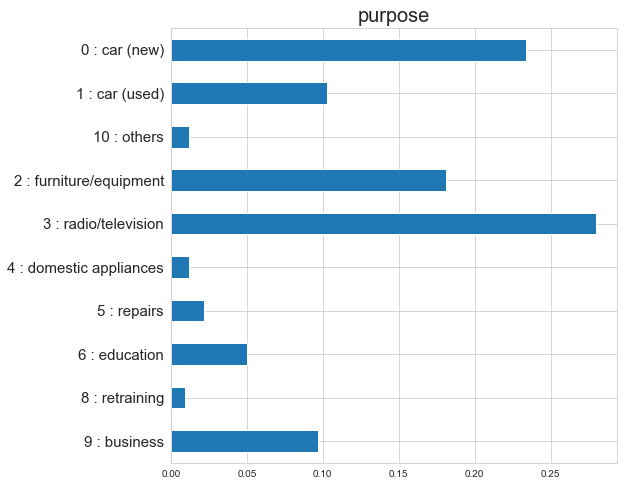

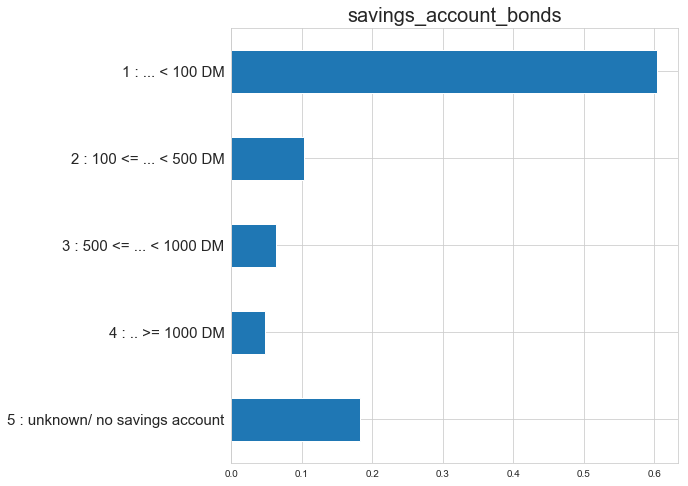

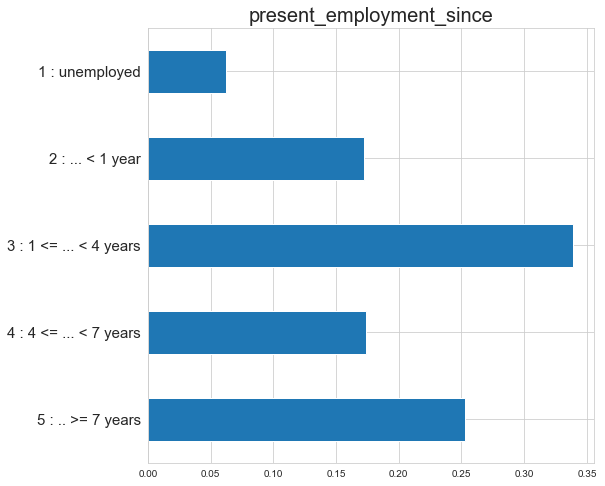

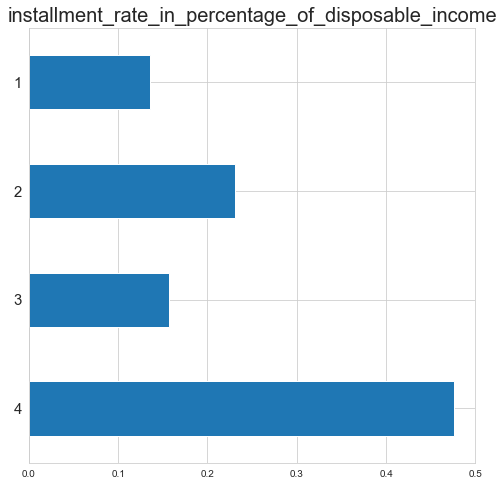

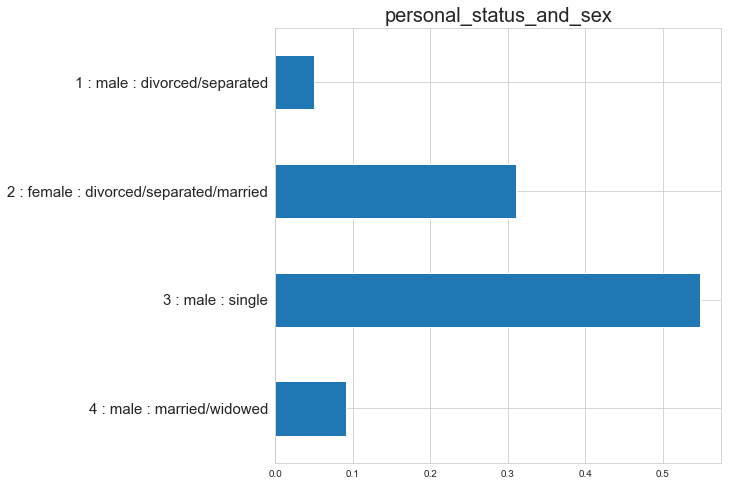

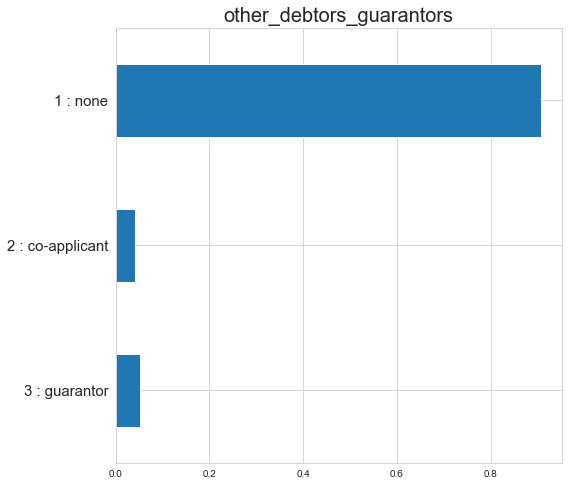

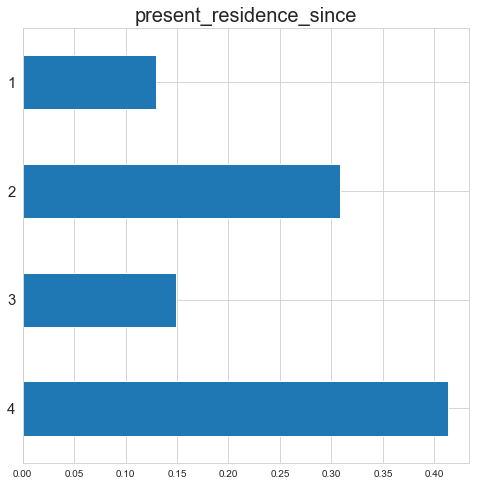

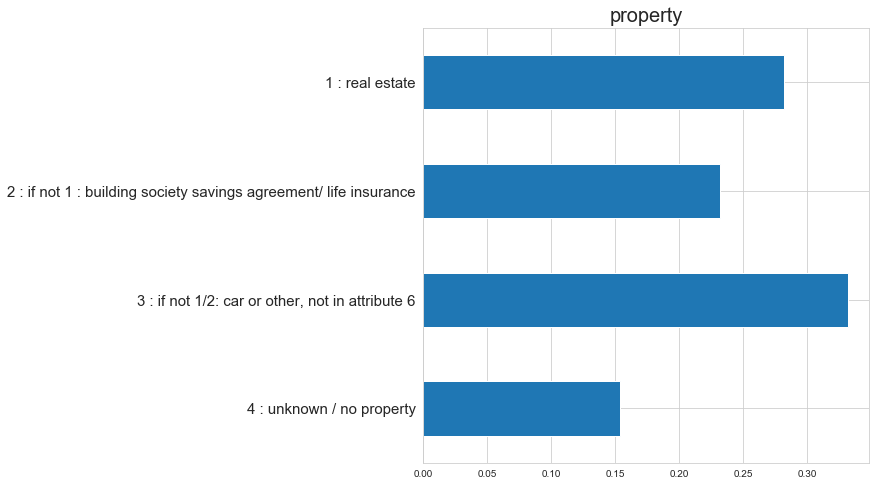

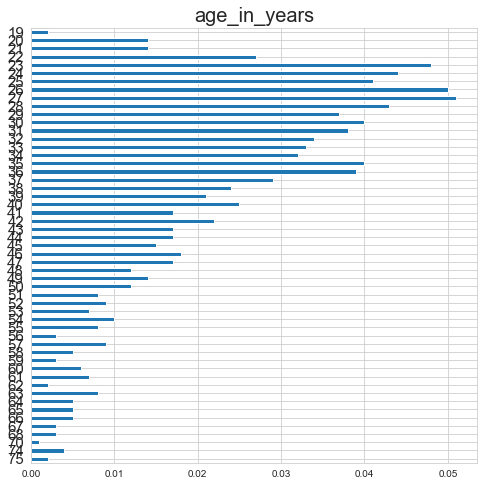

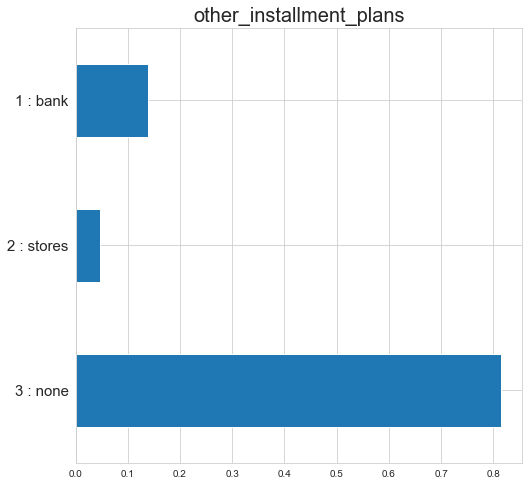

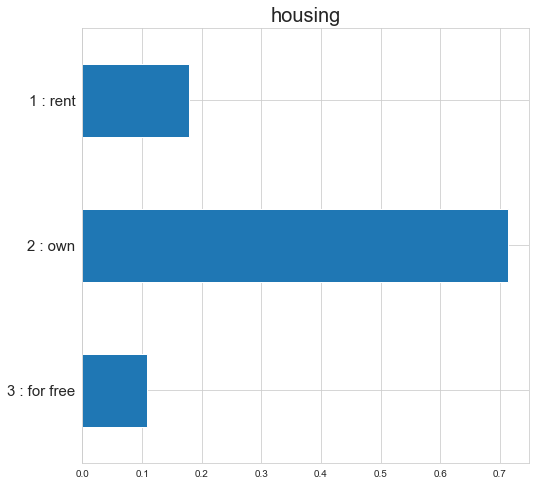

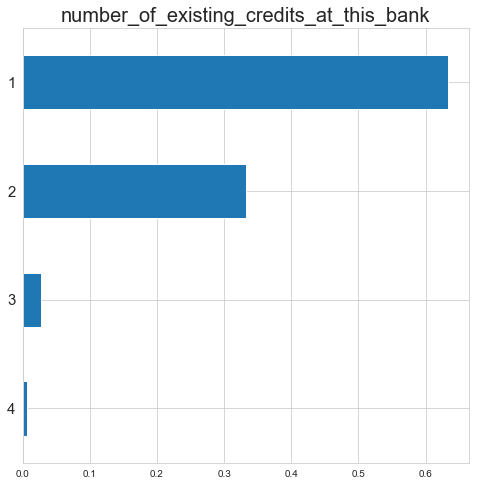

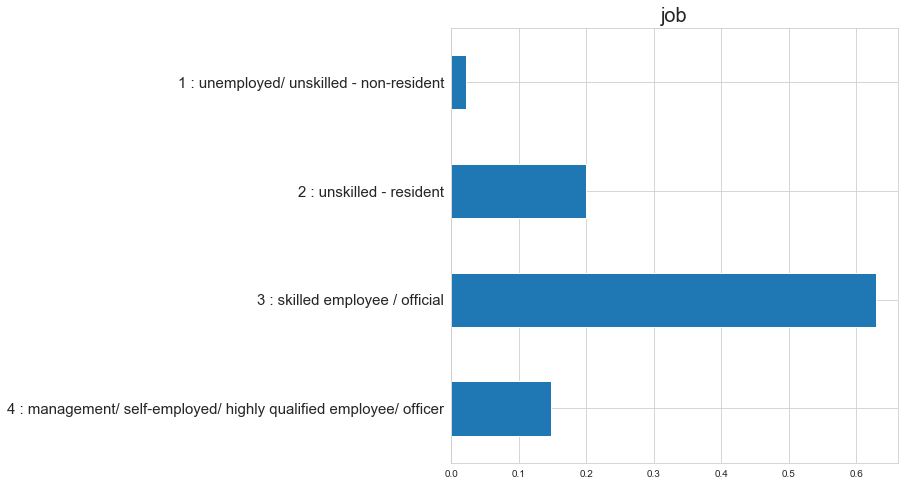

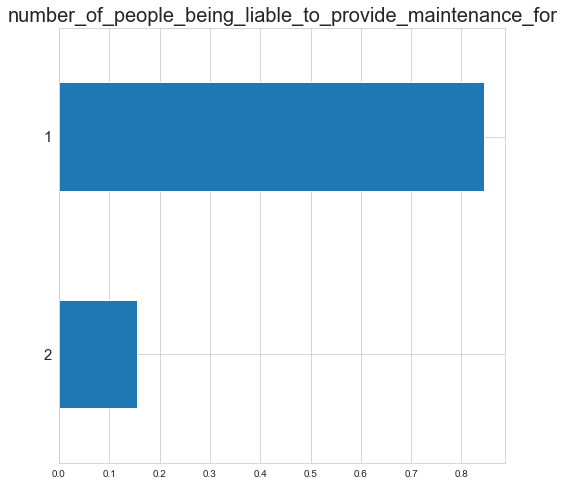

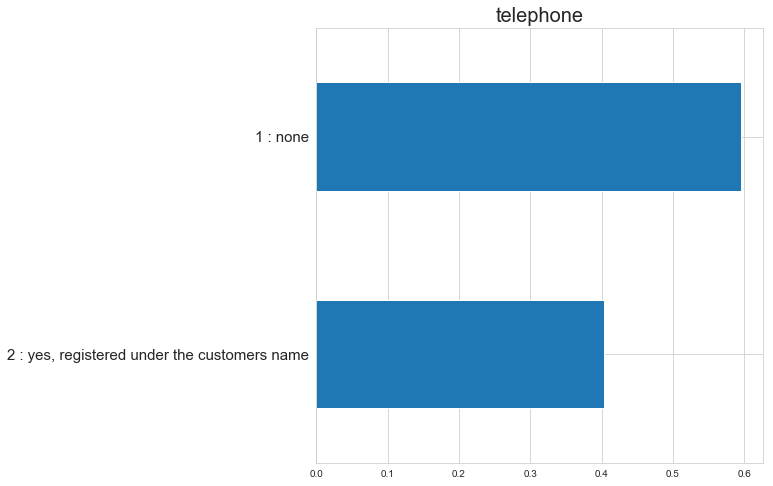

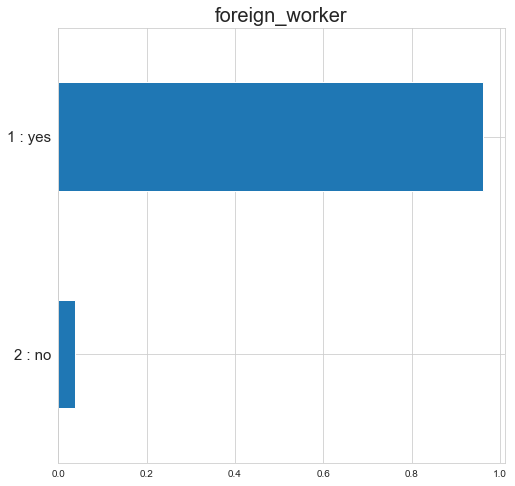

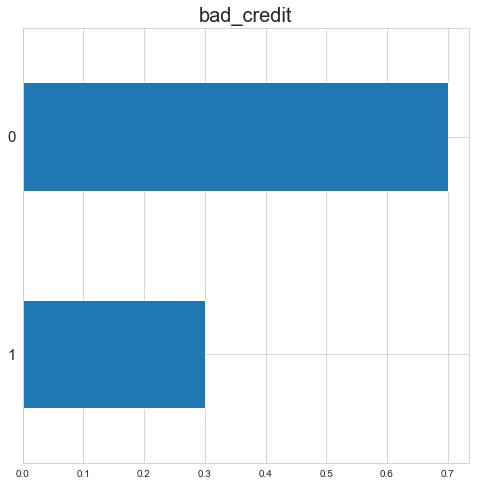

In [100]:
for col in dat.columns:
    if col == 'credit_amount':
        continue
    plt.figure(figsize=(8, 8))
    dat[col].value_counts(1).sort_index(ascending=False).plot(kind='barh');
    plt.yticks(fontsize=15);
    plt.title('{}'.format(col), fontsize=20);

Попробуем оценить условную вероятность одобрения кредита

In [ ]:
sns.distplot(dat.age_in_years[dat.bad_credit == 1])
sns.distplot(dat.age_in_years[dat.bad_credit == 0])

In [303]:
def p_y_x(y, x, data=dat):
    x_dom = np.array(list(data[x].value_counts().sort_index().keys()))
    p_x_y = np.zeros((data[y].value_counts().shape[0], x_dom.shape[0]))
    for n, y_value in enumerate(data[y].value_counts().sort_index().keys()):
        for m, x_value in enumerate(x_dom):
            p_x_y[n, m] = (data[x][data[y] == y_value] == x_value).mean()
    p_y = data[y].value_counts(1).sort_index().values
    p_x = p_y.dot(p_x_y)
    return x_dom, (p_y.reshape(-1, 1)*p_x_y/p_x).T

In [304]:
x, p = p_y_x(y='bad_credit', x='age_in_years')

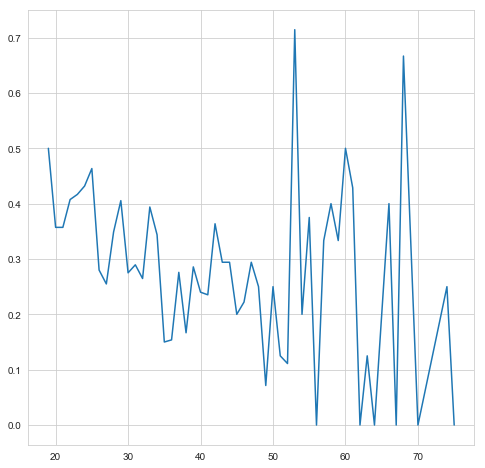

In [330]:
plt.plot(x_dom, p[:, 1]);

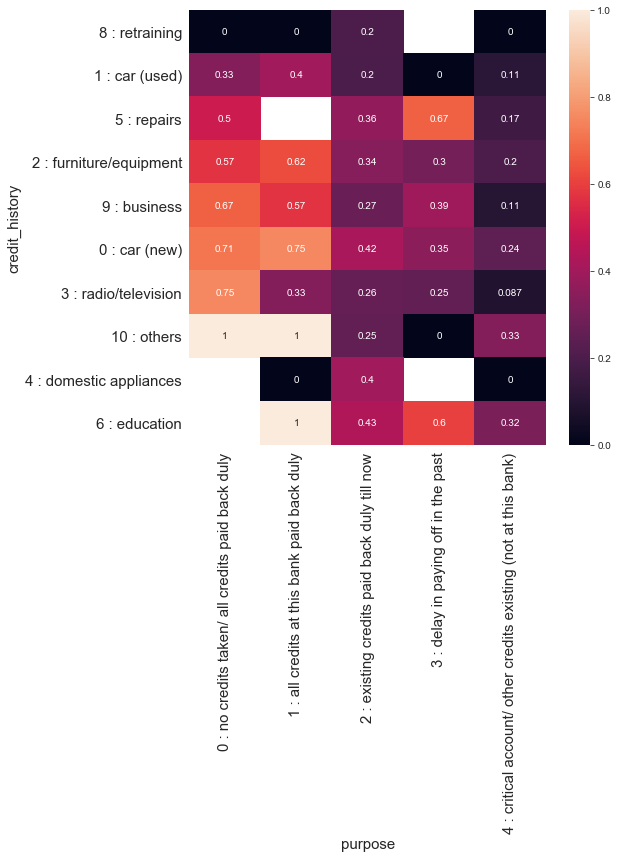

In [197]:
col1 = 'purpose'
col2 = 'credit_history'
a = pd.crosstab(dat[col1], dat[col2], dat['bad_credit'], aggfunc=np.mean)
sns.heatmap(a.sort_values(by=a.columns.values.tolist()), annot=True, annot_kws={'size': 10});
plt.yticks(fontsize=15);
plt.ylabel(col2, fontsize=15);
plt.xlabel(col1, fontsize=15);
plt.xticks(fontsize=15);

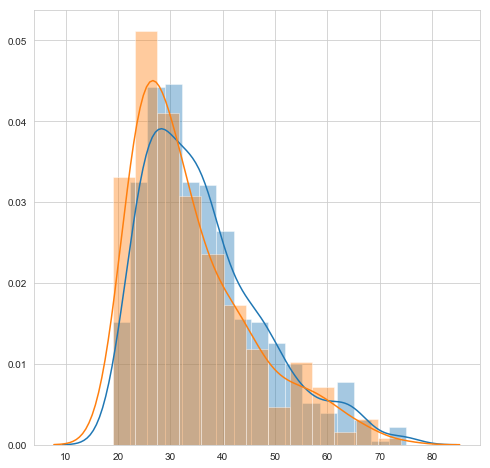

In [117]:
sns.distplot(dat.age_in_years[dat.bad_credit == 0].values)
sns.distplot(dat.age_in_years[dat.bad_credit == 1].values)